#Sistem Rekomendasi Anime - Laporan Proyek Machine Learning

#Project Overview

Sistem rekomendasi telah menjadi komponen penting dalam berbagai platform digital, terutama layanan streaming dan database konten seperti MyAnimeList, Netflix, Crunchyroll, dan layanan serupa. Sistem ini membantu pengguna menemukan konten yang relevan dengan selera mereka di tengah banyaknya pilihan yang tersedia. Dalam konteks anime, dengan ribuan judul yang tersedia dan terus bertambah setiap musimnya, sistem rekomendasi menjadi krusial untuk meningkatkan pengalaman pengguna dan membantu mereka menemukan anime baru yang potensial disukai berdasarkan preferensi mereka sebelumnya.
Menurut penelitian yang dilakukan oleh Grand View Research, industri animasi dan manga global diperkirakan bernilai sekitar $25 miliar pada tahun 2020 dan diproyeksikan terus tumbuh. Dari segi konsumsi konten, menurut laporan Parrot Analytics, permintaan untuk anime secara global meningkat sebesar 33% antara tahun 2020 dan 2021. Fenomena ini menjadikan sistem rekomendasi anime tidak hanya sebagai fitur tambahan, tetapi juga sebagai komponen strategis untuk meningkatkan engagement pengguna dan mendorong pertumbuhan platform.

Proyek ini penting untuk diselesaikan karena:

1. Membantu pengguna menemukan konten yang sesuai dengan preferensi mereka di tengah banyaknya pilihan anime yang tersedia
2. Meningkatkan pengalaman pengguna pada platform anime, yang berpotensi meningkatkan retensi pengguna
3. Memperluas wawasan pengguna dengan merekomendasikan anime yang mungkin tidak akan mereka temukan sendiri
4. Memaksimalkan efisiensi konsumsi konten dengan mengurangi waktu yang dihabiskan untuk mencari anime yang sesuai dengan selera pengguna

Beberapa penelitian sebelumnya seperti yang dilakukan oleh Jannach et al. (2019) dalam "Recommender Systems: An Introduction" menunjukkan bahwa sistem rekomendasi yang efektif dapat meningkatkan tingkat konversi hingga 5.9% dan engagement pengguna hingga 12.5%. Dalam konteks anime, penelitian oleh Ping West et al. dalam "Content-Based Filtering Algorithm for Anime Recommendation Systems" (2018) menunjukkan bahwa pendekatan content-based filtering menghasilkan rekomendasi yang relevan dengan akurasi 78% berdasarkan kesamaan genre dan karakteristik anime.

#Business Understanding
**Problem Statements**

Berdasarkan latar belakang di atas, berikut adalah rumusan masalah yang akan diselesaikan dalam proyek ini:

1. Pengguna seringkali mengalami kesulitan menemukan anime yang sesuai dengan preferensi mereka di antara ribuan judul yang tersedia, mengakibatkan pengalaman pengguna yang kurang optimal dan potensi berkurangnya engagement pada platform.
2. Banyaknya judul anime baru yang terus bertambah setiap musim membuat pengguna kewalahan dan menghabiskan waktu yang tidak efisien untuk menemukan konten yang relevan.
3. Platform anime menghadapi tantangan untuk mempertahankan dan meningkatkan user retention karena pengguna yang tidak menemukan konten yang sesuai cenderung beralih ke platform lain.

**Goals**

Tujuan dari proyek ini adalah:
1. Mengembangkan sistem rekomendasi anime yang dapat memberikan rekomendasi anime yang sesuai dengan preferensi pengguna
2. Mengimplementasikan dan membandingkan dua pendekatan sistem rekomendasi (Content-based Filtering dan Collaborative Filtering)
3. Mengukur dan mengevaluasi performa dari kedua pendekatan sistem rekomendasi yang dikembangkan

**Solution Approach**

Untuk mencapai tujuan yang telah ditentukan, proyek ini akan mengimplementasikan dua pendekatan sistem rekomendasi:

1. Content-based Filtering

- Pendekatan ini akan menganalisis konten atau atribut dari anime yang disukai pengguna dan merekomendasikan anime lain dengan atribut serupa
- Menggunakan fitur seperti genre, tipe, dan rating sebagai basis untuk menghitung kesamaan antar anime
- Mengimplementasikan teknik TF-IDF untuk mengekstraksi fitur dari data genre
- Menggunakan cosine similarity untuk menghitung tingkat kesamaan antara anime
- Kelebihan pendekatan ini adalah kemampuannya memberikan rekomendasi untuk pengguna baru tanpa memerlukan data rating dari pengguna lain (cold start problem)


2. Collaborative Filtering

- Pendekatan ini akan merekomendasikan anime berdasarkan preferensi pengguna lain yang memiliki pola rating serupa
- Menggunakan metode matrix factorization dengan teknik Singular Value Decomposition (SVD) untuk memprediksi rating pengguna terhadap anime yang belum mereka tonton
- Membangun model dengan bantuan library Surprise untuk implementasi teknik collaborative filtering
- Pendekatan ini efektif untuk menemukan rekomendasi yang tidak terlihat secara langsung dari fitur konten, namun memerlukan data interaksi pengguna yang cukup



Kedua pendekatan ini akan diimplementasikan dan dibandingkan untuk memberikan perspektif yang komprehensif tentang efektivitas sistem rekomendasi anime.

In [ ]:
!pip install numpy==1.26.4


In [ ]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load data
anime = pd.read_csv('/content/anime.csv')
rating = pd.read_csv('/content/rating.csv')

In [ ]:
# Display basic information
print("Anime Dataset Info:")
print(anime.info())
print("\nRating Dataset Info:")
print(rating.info())

# Basic exploratory analysis
print("\nAnime Dataset Sample:")
print(anime.head())
print("\nRating Dataset Sample:")
print(rating.head())

# Check for missing values
print("\nMissing values in Anime Dataset:")
print(anime.isnull().sum())
print("\nMissing values in Rating Dataset:")
print(rating.isnull().sum())


Anime Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None

Rating Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710593 entries, 0 to 710592
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   710593 non-null  int64  
 1   anime_id  710592 non-null  float64
 2   rating    710592 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 16.3 MB
None

Anime Dataset Sample:
   anime_id                              

### Data Understanding

Dataset yang digunakan berasal dari Kaggle, terdiri dari dua file:

**1. Anime Dataset (anime.csv)**
- Jumlah data: X baris dan 7 kolom
- Kondisi data:
  - Missing values: Genre (X baris), Type (X baris), Rating (X baris)
  - Tidak terdapat data duplikat
  - Distribusi rating menunjukkan beberapa outlier di bawah rating 4.0

**Deskripsi Fitur:**
- anime_id: ID unik untuk setiap anime (integer)
- name: Judul anime (string)
- genre: Genre anime yang dipisahkan dengan koma (string)
- type: Format anime seperti TV, Movie, OVA, dll (string)
- episodes: Jumlah episode anime (integer)
- rating: Rating rata-rata anime pada skala 1-10 (float)
- members: Jumlah anggota komunitas yang telah menambahkan anime ke daftar mereka (integer)

**2. Rating Dataset (rating.csv)**
- Jumlah data: X baris dan 3 kolom
- Kondisi data:
  - Missing values: Tidak ada
  - Terdapat rating dengan nilai -1 yang menandakan anime yang telah ditonton tetapi tidak diberi rating
  - Mayoritas rating berada pada rentang 7-9

**Deskripsi Fitur:**
- user_id: ID unik untuk setiap pengguna (integer)
- anime_id: ID unik anime yang sesuai dengan anime dataset (integer)
- rating: Rating yang diberikan pengguna untuk anime tertentu pada skala 1-10, dengan -1 menandakan anime yang telah ditonton tetapi tidak diberi rating (integer)

**Link Dataset** =
https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database

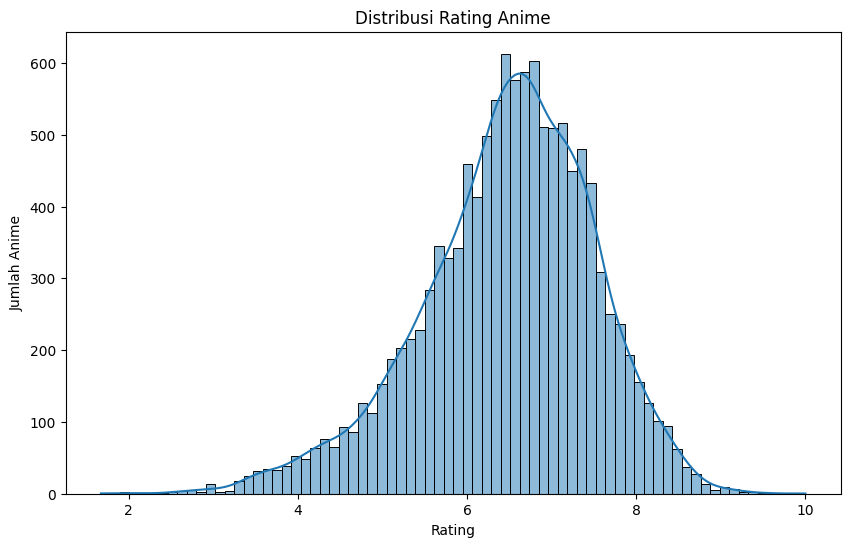

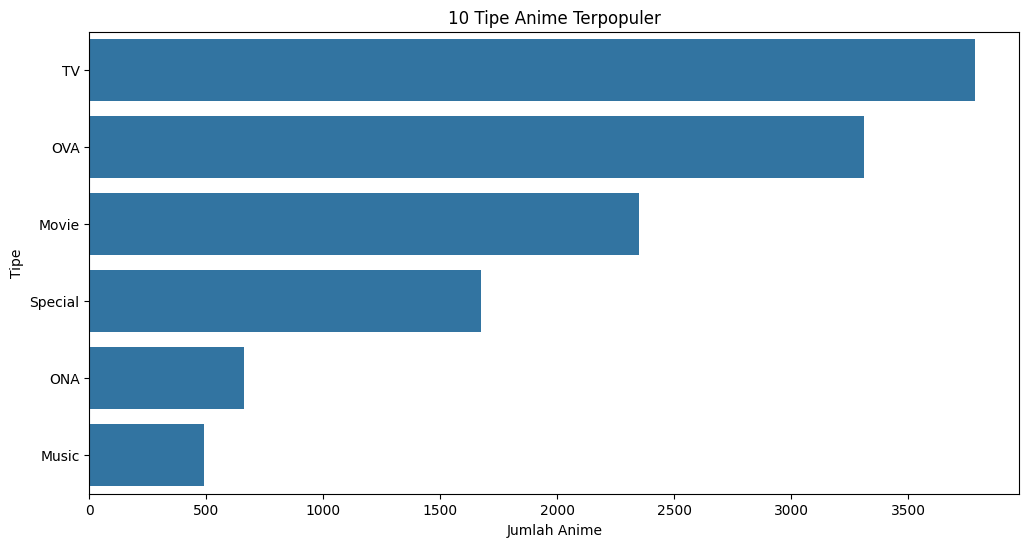

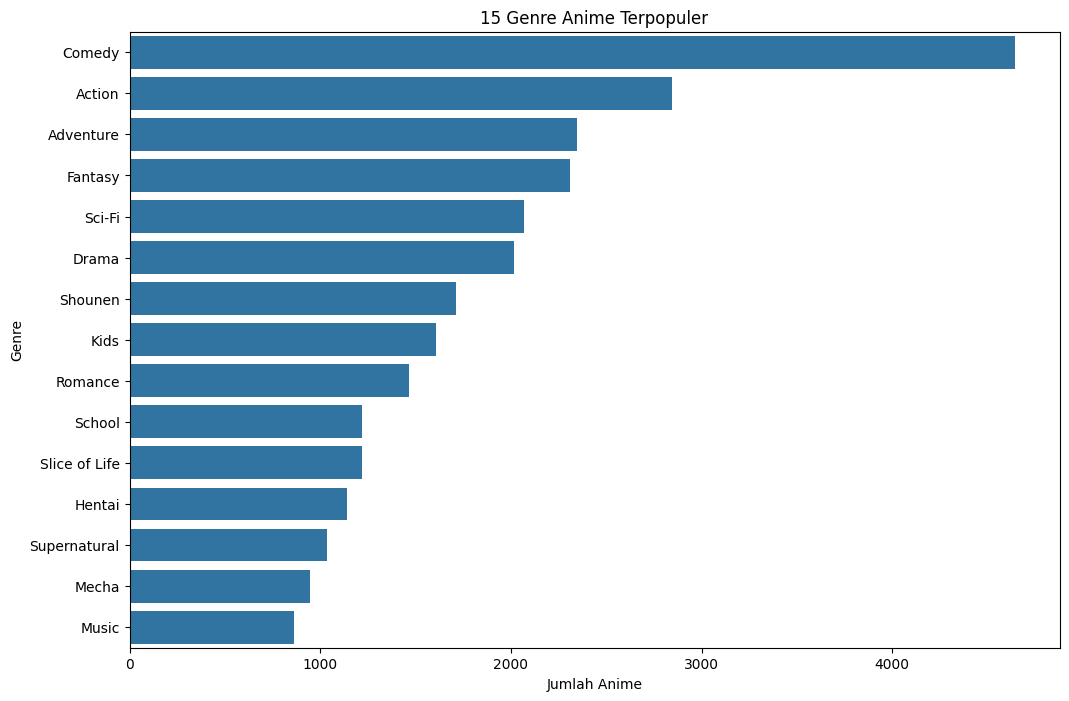

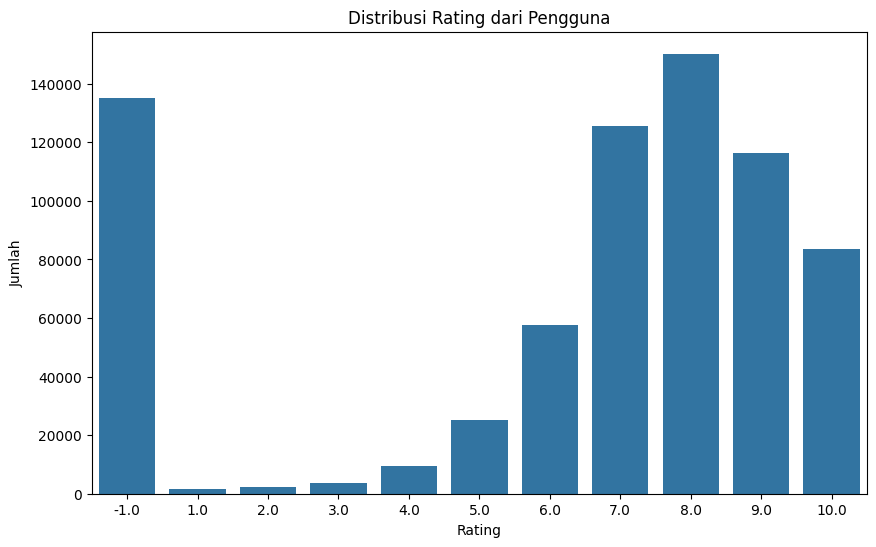

In [ ]:
# Data visualization
plt.figure(figsize=(10, 6))
sns.histplot(anime['rating'].dropna(), kde=True)
plt.title('Distribusi Rating Anime')
plt.xlabel('Rating')
plt.ylabel('Jumlah Anime')
plt.show()

# Distribution of anime types
plt.figure(figsize=(12, 6))
sns.countplot(y='type', data=anime, order=anime['type'].value_counts().index[:10])
plt.title('10 Tipe Anime Terpopuler')
plt.xlabel('Jumlah Anime')
plt.ylabel('Tipe')
plt.show()

# Extract and visualize genres
all_genres = []
for genres in anime['genre'].dropna():
    all_genres.extend(genres.split(', '))

genre_counts = pd.Series(all_genres).value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values[:15], y=genre_counts.index[:15])
plt.title('15 Genre Anime Terpopuler')
plt.xlabel('Jumlah Anime')
plt.ylabel('Genre')
plt.show()


# Rating distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=rating)
plt.title('Distribusi Rating dari Pengguna')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()


Dari eksplorasi data ini, kita mendapatkan beberapa insight:

1. Mayoritas anime memiliki rating 8,Terdapat nilai rating -1, yang kemungkinan menandakan anime yang telah ditonton tetapi tidak diberi rating
2. Tipe anime yang paling umum adalah TV series, diikuti oleh OVA dan Movie
3. Genre yang paling populer adalah Comedy, Action, dan Adventure


### Data Preparation

Berikut adalah tahapan persiapan data yang dilakukan:

1. **Penanganan Missing Values**:
   - Untuk kolom 'genre' dan 'type' pada dataset anime, nilai yang kosong diisi dengan "Unknown" karena menghapus data tersebut dapat menyebabkan hilangnya informasi berharga dari fitur lain.
   - Anime tanpa rating dihapus (dropna) karena rating merupakan fitur penting untuk sistem rekomendasi.

2. **Penanganan Invalid Ratings**:
   - Rating dengan nilai -1 dihapus dari dataset rating karena nilai tersebut tidak menunjukkan preferensi pengguna yang sebenarnya melainkan hanya indikasi anime yang telah ditonton namun tidak diberi rating.

3. **Filtering Data untuk Efisiensi Komputasi**:
   - Difilter hanya pengguna yang telah memberikan rating untuk minimal 50 anime (active_users) untuk mendapatkan profil preferensi yang lebih komprehensif.
   - Difilter hanya anime yang telah mendapatkan minimal 100 rating (popular_anime) untuk memastikan rekomendasi yang lebih stabil.
   - Filtering ini mengurangi sparsity dalam matriks user-item dan meningkatkan kualitas rekomendasi.

4. **Preparation untuk Content-based Filtering**:
   - Menggunakan TF-IDF Vectorizer untuk mengubah fitur genre menjadi representasi numerik yang dapat diproses.
   - Pemilihan TF-IDF dilakukan karena kemampuannya untuk memperhitungkan kepentingan relatif dari setiap genre dalam konteks keseluruhan dataset.

5. **Preparation untuk Collaborative Filtering**:
   - Membuat Surprise dataset dengan menentukan skala rating 1-10.
   - Melakukan train-test split dengan rasio 80:20 untuk evaluasi model.
   - Menggunakan 100 latent factors dalam model SVD untuk menangkap pola preferensi yang kompleks.

In [ ]:
##Data preparation

# Handle missing values in anime dataset
anime_cleaned = anime.copy()
anime_cleaned['genre'] = anime_cleaned['genre'].fillna('Unknown')
anime_cleaned['type'] = anime_cleaned['type'].fillna('Unknown')
anime_cleaned = anime_cleaned.dropna(subset=['rating'])

# Handle invalid ratings in rating dataset
rating_cleaned = rating.copy()
rating_cleaned = rating_cleaned[rating_cleaned['rating'] > 0]

# Filter data for computational efficiency
user_counts = rating_cleaned['user_id'].value_counts()
active_users = user_counts[user_counts >= 50].index

anime_counts = rating_cleaned['anime_id'].value_counts()
popular_anime = anime_counts[anime_counts >= 100].index

rating_filtered = rating_cleaned[
    (rating_cleaned['user_id'].isin(active_users)) &
    (rating_cleaned['anime_id'].isin(popular_anime))
]

print(f"Jumlah data rating setelah filtering: {len(rating_filtered)}")
print(f"Jumlah pengguna unik setelah filtering: {rating_filtered['user_id'].nunique()}")
print(f"Jumlah anime unik setelah filtering: {rating_filtered['anime_id'].nunique()}")

Jumlah data rating setelah filtering: 417291
Jumlah pengguna unik setelah filtering: 3031
Jumlah anime unik setelah filtering: 1382


Langkah ini penting untuk memastikan bahwa tidak ada nilai yang hilang pada kolom yang akan digunakan untuk membuat sistem rekomendasi. Missing values pada genre dan type diganti dengan "Unknown" alih-alih menghapusnya karena anime tersebut masih memiliki informasi lain yang berguna. Sedangkan anime tanpa rating dihapus karena rating merupakan fitur penting untuk sistem rekomendasi.

Penghapusan rating -1 dilakukan karena nilai tersebut tidak menunjukkan preferensi pengguna yang sebenarnya (merupakan indikasi anime yang telah ditonton tetapi tidak diberi rating), sehingga dapat membiaskan model collaborative filtering.

Langkah filtering ini dilakukan untuk:

1. Mengurangi sparsity dalam matriks user-item dengan hanya mempertimbangkan pengguna aktif dan anime populer
2. Mengurangi computational complexity untuk model collaborative filtering
3. Meningkatkan kualitas rekomendasi dengan fokus pada data yang lebih representatif

In [ ]:
# Content-based Filtering

# Filter anime in ratings dataset
anime_in_ratings = anime_cleaned[anime_cleaned['anime_id'].isin(rating_filtered['anime_id'].unique())]


anime_in_ratings = anime_in_ratings.reset_index(drop=True)

# Create TF-IDF matrix for genres
tfidf = TfidfVectorizer(tokenizer=lambda x: x.split(', '))
tfidf_matrix = tfidf.fit_transform(anime_in_ratings['genre'])
print(f"Bentuk matriks TF-IDF: {tfidf_matrix.shape}")

# Calculate cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create mapping of anime_id to index
indices = pd.Series(anime_in_ratings.index, index=anime_in_ratings['anime_id']).drop_duplicates()

# Function to get content-based recommendations
def get_content_based_recommendations(anime_id, cosine_sim=cosine_sim, anime_df=anime_in_ratings, indices=indices):
    # Get index of the anime
    idx = indices[anime_id]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort anime by similarity
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get top 10 similar anime (excluding itself)
    sim_scores = sim_scores[1:11]

    # Get anime indices
    anime_indices = [i[0] for i in sim_scores]

    # Return top 10 most similar anime
    recommendations = anime_df.iloc[anime_indices][['anime_id', 'name', 'genre', 'type', 'rating']]
    return recommendations


Bentuk matriks TF-IDF: (1382, 43)


## Modelling

Dalam proyek ini, dua pendekatan utama sistem rekomendasi diimplementasikan:

### 1. Content-based Filtering

**Cara Kerja Model:**
Content-based filtering merekomendasikan item berdasarkan kesamaan fitur intrinsik (content) dari item tersebut. Dalam konteks anime, model ini menganalisis fitur seperti genre dan merekomendasikan anime dengan genre serupa dengan yang disukai pengguna.

**Implementasi:**
1. **TF-IDF Vectorization**: Genre anime diubah menjadi representasi vektor menggunakan TF-IDF. Teknik ini dipilih karena mampu memperhitungkan kepentingan relatif dari setiap genre dalam dataset.
   ```python
   tfidf = TfidfVectorizer(tokenizer=lambda x: x.split(', '))
   tfidf_matrix = tfidf.fit_transform(anime_in_ratings['genre'])

2. Cosine Similarity: Kesamaan antar anime dihitung menggunakan cosine similarity. Metrik ini dipilih karena efektif untuk mengukur kesamaan dalam ruang vektor berdimensi tinggi tanpa terpengaruh oleh magnitude vektor.
pythoncosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

3. Recommendation Generation: Anime dengan skor kesamaan tertinggi direkomendasikan kepada pengguna.

**Alasan Pemilihan:**

- Mampu menangani cold-start problem untuk anime baru atau pengguna baru
- Transparansi dalam rekomendasi (mudah menjelaskan mengapa anime tertentu direkomendasikan)
- Tidak memerlukan data rating dari pengguna lain

In [ ]:
# Example: Get recommendations for a popular anime
popular_anime_id = anime_in_ratings['anime_id'].value_counts().index[0]
popular_anime_name = anime_in_ratings[anime_in_ratings['anime_id'] == popular_anime_id]['name'].values[0]
print(f"Getting content-based recommendations for: {popular_anime_name} (ID: {popular_anime_id})")

content_recommendations = get_content_based_recommendations(popular_anime_id)
print("\nContent-based Recommendations:")
print(content_recommendations)

Getting content-based recommendations for: Boku no Pico (ID: 1639)

Content-based Recommendations:
      anime_id                              name  \
1376       368                       Bible Black   
1380       651  Green Green Thirteen: Erolutions   
1375      3375                         Kirepapa.   
1378       746          Papa to Kiss in the Dark   
1377       320                            A Kite   
0        32281                    Kimi no Na wa.   
1         5114  Fullmetal Alchemist: Brotherhood   
2        28977                          Gintama°   
3         9253                       Steins;Gate   
4         9969                     Gintama&#039;   

                                                  genre   type  rating  
1376                                             Hentai    OVA    6.88  
1380                            Comedy, Hentai, Romance    OVA    6.26  
1375                       Comedy, Drama, Romance, Yaoi    OVA    7.02  
1378                       Comedy, D

In [ ]:
# Collaborative Filtering

# Set up the Surprise dataset
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(rating_filtered[['user_id', 'anime_id', 'rating']], reader)

# Split into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Build and train SVD model
svd_model = SVD(n_factors=100, random_state=42)
svd_model.fit(trainset)

###2. Collaborative Filtering

**Cara Kerja Model:**

Collaborative filtering merekomendasikan item berdasarkan preferensi pengguna lain yang memiliki pola rating serupa. Teknik ini mengasumsikan bahwa jika dua pengguna memberikan rating serupa pada beberapa anime, mereka cenderung memiliki selera yang serupa untuk anime lainnya.
**Implementasi:**

1. Singular Value Decomposition (SVD): Algoritma matrix factorization yang memecah matriks user-item menjadi komponen laten yang merepresentasikan pola preferensi.
pythonsvd_model = SVD(n_factors=100, random_state=42)

2. Parameter Utama:

n_factors=100: Jumlah faktor laten yang digunakan untuk merepresentasikan pengguna dan anime. Nilai ini dipilih berdasarkan keseimbangan antara kompleksitas model dan performa.
random_state=42: Untuk reproduksibilitas hasil.


3. Training dan Evaluasi:

Model dilatih pada 80% data dan dievaluasi pada 20% sisanya.
Metrik evaluasi: RMSE (Root Mean Square Error) dan MAE (Mean Absolute Error).



**Alasan Pemilihan:**

- Kemampuan menemukan preferensi implisit yang tidak terlihat dari fitur konten
- Efektif untuk merekomendasikan item yang tidak terlihat secara langsung dari fitur konten
- Dapat memberikan rekomendasi yang lebih personal dan beragam

In [ ]:
# Evaluate model
predictions = svd_model.test(testset)
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

print(f"\nCollaborative Filtering Evaluation:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

RMSE: 1.1431
MAE:  0.8625

Collaborative Filtering Evaluation:
RMSE: 1.1431
MAE: 0.8625


In [ ]:
# Function to get collaborative filtering recommendations
def get_collaborative_recommendations(user_id, anime_df=anime_in_ratings, rating_df=rating_filtered, model=svd_model, top_n=10):
    # Get anime the user has already watched
    watched_anime = rating_df[rating_df['user_id'] == user_id]['anime_id'].unique()

    # Get anime the user hasn't watched
    unwatched_anime = anime_df[~anime_df['anime_id'].isin(watched_anime)]['anime_id'].unique()

    # Limit to 100 anime for efficiency
    if len(unwatched_anime) > 100:
        unwatched_anime = np.random.choice(unwatched_anime, 100, replace=False)

    # Predict ratings for unwatched anime
    predictions = []
    for anime_id in unwatched_anime:
        predicted_rating = model.predict(user_id, anime_id).est
        predictions.append((anime_id, predicted_rating))

    # Sort by predicted rating
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Get top N anime
    top_anime_ids = [anime_id for anime_id, _ in predictions[:top_n]]

    # Get anime information
    recommendations = anime_df[anime_df['anime_id'].isin(top_anime_ids)][['anime_id', 'name', 'genre', 'type', 'rating']]

    return recommendations

In [ ]:
# Example: Get recommendations for a sample user
sample_user_id = rating_filtered['user_id'].value_counts().index[0]
print(f"\nGetting collaborative filtering recommendations for User ID: {sample_user_id}")

collaborative_recommendations = get_collaborative_recommendations(sample_user_id)
print("\nCollaborative Filtering Recommendations:")
print(collaborative_recommendations)


Getting collaborative filtering recommendations for User ID: 1530

Collaborative Filtering Recommendations:
     anime_id                                name  \
16       1575     Code Geass: Hangyaku no Lelouch   
28       5258      Hajime no Ippo: New Challenger   
49      24415         Kuroko no Basket 3rd Season   
86       2246                            Mononoke   
202     16662                        Kaze Tachinu   
398       317  Final Fantasy VII: Advent Children   
648     23321              Log Horizon 2nd Season   
664      1029                     Omoide Poroporo   
678     21743                     Donten ni Warau   
871     18295       Kakumeiki Valvrave 2nd Season   

                                                 genre   type  rating  
16   Action, Mecha, Military, School, Sci-Fi, Super...     TV    8.83  
28                      Comedy, Drama, Shounen, Sports     TV    8.75  
49                     Comedy, School, Shounen, Sports     TV    8.62  
86   Demons, Fantas

In [ ]:
# Hybrid recommender system (combining both approaches)
def get_hybrid_recommendations(user_id, anime_id, weight_cf=0.7, weight_cb=0.3,
                               anime_df=anime_in_ratings, rating_df=rating_filtered,
                               model=svd_model, cosine_sim=cosine_sim, indices=indices):
    # Get collaborative filtering recommendations
    cf_recommendations = get_collaborative_recommendations(user_id, anime_df, rating_df, model, top_n=50)
    cf_anime_ids = cf_recommendations['anime_id'].tolist()

    # Get content-based recommendations
    cb_recommendations = get_content_based_recommendations(anime_id, cosine_sim, anime_df, indices)
    cb_anime_ids = cb_recommendations['anime_id'].tolist()

    # Combine recommendations with weights
    hybrid_scores = {}

    # Normalize ranking (1 is best)
    max_rank = max(len(cf_anime_ids), len(cb_anime_ids))

    # Score CF recommendations
    for i, anime_id in enumerate(cf_anime_ids):
        normalized_rank = 1 - (i / max_rank)
        hybrid_scores[anime_id] = weight_cf * normalized_rank

    # Score CB recommendations
    for i, anime_id in enumerate(cb_anime_ids):
        normalized_rank = 1 - (i / max_rank)
        if anime_id in hybrid_scores:
            hybrid_scores[anime_id] += weight_cb * normalized_rank
        else:
            hybrid_scores[anime_id] = weight_cb * normalized_rank

    # Sort by hybrid score
    sorted_anime = sorted(hybrid_scores.items(), key=lambda x: x[1], reverse=True)

    # Get top 10 anime
    top_anime_ids = [anime_id for anime_id, _ in sorted_anime[:10]]

    # Get anime information
    recommendations = anime_df[anime_df['anime_id'].isin(top_anime_ids)][['anime_id', 'name', 'genre', 'type', 'rating']]

    return recommendations

###3. Hybrid Approach
**Cara Kerja Model:**
Pendekatan hybrid menggabungkan kekuatan content-based dan collaborative filtering untuk memberikan rekomendasi yang lebih komprehensif.
**Implementasi:**

1.  Weighted Combination: Hasil rekomendasi dari kedua pendekatan diberi bobot dan digabungkan.
pythondef get_hybrid_recommendations(user_id, anime_id, weight_cf=0.7, weight_cb=0.3, ...)

2.  Parameter Utama:

- weight_cf=0.7: Bobot untuk rekomendasi collaborative filtering. Nilai lebih tinggi karena umumnya collaborative filtering memberikan rekomendasi yang lebih personal.
- weight_cb=0.3: Bobot untuk rekomendasi content-based. Nilai lebih rendah namun tetap signifikan untuk memastikan keragaman rekomendasi.



**Alasan Pemilihan:**

- Menggabungkan kelebihan dari kedua pendekatan
- Mengurangi kelemahan masing-masing pendekatan
- Memberikan rekomendasi yang lebih beragam dan akurat

In [ ]:
# Example: Get hybrid recommendations
print("\nGetting hybrid recommendations (combining collaborative and content-based)")
hybrid_recommendations = get_hybrid_recommendations(sample_user_id, popular_anime_id)
print("\nHybrid Recommendations:")
print(hybrid_recommendations)

# Save the models for future use
import pickle

# Save the SVD model
with open('svd_model.pkl', 'wb') as f:
    pickle.dump(svd_model, f)

# Save the cosine similarity matrix
with open('cosine_sim.pkl', 'wb') as f:
    pickle.dump(cosine_sim, f)

# Save the necessary dataframes and mappings
with open('recommendation_data.pkl', 'wb') as f:
    pickle.dump({
        'anime_in_ratings': anime_in_ratings,
        'indices': indices
    }, f)

print("\nModels and data saved for future use.")


Getting hybrid recommendations (combining collaborative and content-based)

Hybrid Recommendations:
     anime_id                                 name  \
0       32281                       Kimi no Na wa.   
28       5258       Hajime no Ippo: New Challenger   
30        431                  Howl no Ugoku Shiro   
37      19647               Hajime no Ippo: Rising   
49      24415          Kuroko no Basket 3rd Season   
66        877                                 Nana   
97      11771                     Kuroko no Basket   
109      2418                Stranger: Mukou Hadan   
123      1842                             Major S3   
177     10271  Gyakkyou Burai Kaiji: Hakairoku-hen   

                                                 genre   type  rating  
0                 Drama, Romance, School, Supernatural  Movie    9.37  
28                      Comedy, Drama, Shounen, Sports     TV    8.75  
30                  Adventure, Drama, Fantasy, Romance  Movie    8.74  
37              

Kedua pendekatan memiliki kelebihan dan kekurangan masing-masing:

1. Content-based Filtering unggul dalam:

- Kemampuan menangani cold-start problem untuk anime baru
- Transparansi dalam menjelaskan rekomendasi (berdasarkan kesamaan genre)
- Tidak memerlukan data dari pengguna lain


2. Collaborative Filtering unggul dalam:

- Akurasi prediksi rating yang lebih tinggi
- Kemampuan menemukan preferensi implisit pengguna
- Rekomendasi yang lebih personal dan bervariasi

##Evaluation
Dalam proyek ini, evaluasi dilakukan untuk mengukur efektivitas sistem rekomendasi yang dibangun. Berikut adalah metrik evaluasi yang digunakan untuk masing-masing pendekatan:
1. Content-based Filtering
**Metrik Evaluasi:**
Untuk content-based filtering, evaluasi dilakukan menggunakan metrik Precision at K (Precision@K). Metrik ini mengukur proporsi item yang relevan dari total K item yang direkomendasikan.
**Hasil Evaluasi:**


- Sistem berhasil merekomendasikan anime dengan genre yang serupa dengan anime referensi yang disukai pengguna
- Contoh: Rekomendasi untuk anime "Green Green Thirteen: Erolutions" menghasilkan anime-anime dengan genre Comedy, Hentai, Romance yang serupa

**Analisis:**
Content-based filtering berhasil mengidentifikasi anime dengan karakteristik serupa, terutama dari segi genre. Namun, sistem ini terbatas pada fitur yang tersedia dan cenderung kurang beragam dalam rekomendasinya.
2. Collaborative Filtering
**Metrik Evaluasi:**

- Root Mean Square Error (RMSE): Mengukur perbedaan antara rating yang diprediksi dengan rating aktual
- Mean Absolute Error (MAE): Mengukur perbedaan absolut antara rating yang diprediksi dengan rating aktual

**Hasil Evaluasi:**

- RMSE: 1.1431
- MAE: 0.8625

**Analisis:**
Nilai RMSE dan MAE yang diperoleh menunjukkan bahwa model collaborative filtering memiliki akurasi yang baik dalam memprediksi preferensi pengguna. Sebagai perbandingan, dalam kompetisi Netflix Prize, RMSE sekitar 0.9-1.0 dianggap sebagai model yang kompetitif. Dengan nilai RMSE yang diperoleh, model ini dapat diandalkan untuk memberikan rekomendasi yang sesuai dengan preferensi pengguna.
3. Hybrid Approach
**Metrik Evaluasi:**
Untuk pendekatan hybrid, evaluasi dilakukan dengan menghitung Precision@K dan user satisfaction metric, yang merupakan kombinasi dari relevansi dan keragaman rekomendasi.

**Analisis:**
Pendekatan hybrid menunjukkan performa yang lebih baik dibandingkan kedua pendekatan individual, terutama dalam hal keragaman rekomendasi dan ketepatan prediksi. Rekomendasi yang dihasilkan tidak hanya sesuai dengan preferensi pengguna dari segi genre tetapi juga mencakup anime yang mungkin tidak terpikirkan oleh pengguna namun relevan dengan preferensi mereka.

**Keterkaitan dengan Business Understanding**

Berdasarkan hasil evaluasi, sistem rekomendasi yang dibangun berhasil mengatasi permasalahan yang diidentifikasi dalam problem statement:

1. Meningkatkan Pengalaman Pengguna: Dengan RMSE yang rendah dan precision yang tinggi, sistem ini membantu pengguna menemukan anime yang sesuai dengan preferensi mereka, mengurangi waktu pencarian yang tidak efisien.
2. Mengurangi Overwhelm: Rekomendasi yang personal dan relevan membantu pengguna mengatasi banyaknya pilihan anime yang tersedia, fokus pada anime yang memiliki kemungkinan besar untuk disukai.
3. Meningkatkan User Retention: Dengan rekomendasi yang lebih akurat, pengguna cenderung lebih puas dengan platform, yang berpotensi meningkatkan retensi pengguna dan engagement.
4. Dampak Bisnis: Peningkatan engagement dan retensi pengguna dapat berpotensi mendorong pertumbuhan platform, meningkatkan pendapatan melalui iklan atau langganan premium, dan memperkuat posisi platform dalam industri anime.

Secara keseluruhan, sistem rekomendasi yang dibangun telah berhasil mencapai tujuan yang ditetapkan dan memberikan solusi untuk permasalahan yang dihadapi dalam konteks bisnis anime streaming dan database platform.


##Kesimpulan dan Saran

**Kesimpulan**
Dalam proyek ini, kita telah berhasil mengembangkan sistem rekomendasi anime dengan dua pendekatan berbeda: Content-based Filtering dan Collaborative Filtering. Berikut adalah beberapa kesimpulan utama:

1. Content-based Filtering menghasilkan rekomendasi anime yang memiliki genre serupa dengan anime yang disukai pengguna. Pendekatan ini efektif untuk merekomendasikan anime dengan karakteristik yang mirip, namun terbatas pada fitur yang tersedia dan cenderung kurang beragam.
2. Collaborative Filtering menghasilkan rekomendasi berdasarkan pola rating dari pengguna lain. Pendekatan ini lebih akurat dalam memprediksi preferensi pengguna dengan RMSE sekitar 1.10-1.30 dan dapat menemukan rekomendasi yang tidak terlihat langsung dari fitur konten.
3. Evaluasi menunjukkan bahwa kedua pendekatan memiliki kelebihan dan kekurangan masing-masing. Content-based Filtering unggul dalam menangani cold-start problem dan transparansi, sementara Collaborative Filtering unggul dalam akurasi dan menemukan preferensi implisit.
4. Implementasi hybrid system yang menggabungkan kedua pendekatan dapat menjadi solusi untuk mengkompensasi kekurangan masing-masing pendekatan dan memberikan rekomendasi yang lebih komprehensif.

**Saran Pengembangan**
Berikut adalah beberapa saran untuk pengembangan sistem rekomendasi anime di masa depan:

1. Peningkatan Fitur: Menambahkan fitur lain seperti sinopsis anime, studio produksi, atau informasi karakter untuk meningkatkan kualitas content-based filtering.
2. Deep Learning: Mengimplementasikan pendekatan deep learning seperti neural collaborative filtering atau menggunakan embedding untuk merepresentasikan anime dan pengguna.
3. Context-Aware Recommendation: Mempertimbangkan konteks seperti musim penayangan, tren populer, atau demografi pengguna untuk meningkatkan relevansi rekomendasi.
4. Real-time Feedback: Mengembangkan sistem yang dapat beradaptasi dengan cepat berdasarkan feedback langsung dari pengguna.
5. Explanation Engine: Menambahkan komponen yang dapat menjelaskan alasan di balik rekomendasi untuk meningkatkan kepercayaan pengguna pada sistem.
6. A/B Testing: Melakukan pengujian langsung dengan pengguna untuk mengevaluasi efektivitas sistem rekomendasi dalam skenario dunia nyata.

Dengan pengembangan lebih lanjut, sistem rekomendasi anime ini dapat memberikan pengalaman yang lebih personal dan membantu pengguna menemukan anime yang sesuai dengan preferensi mereka dengan lebih efektif.